# Pymaceuticals Inc.
---

### Analysis

- Upon completion of the assignment, I was able to make three observations from the data. 
    #1.  The ratio of male to female mice in this data is almost exactly 50/50, with males at 50.6% and females at 49.4% of 
    the population.
    #2.  The data also shows that the majority of the mice with the lowest tumor volumes are the ones on the drugs Capomulin 
    and Ramicane. Ironically, these two drugs have the highest number of mice on them as compared to the other drugs.
    #3  The drug Infubinol is the only one of the four drugs that showed up with any outlier data.  Also, only one mouse, Mouse 
    ID 'g989' was a duplicate in the data, showing up under the Mouse ID and Timepoint columns.
    
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_comb_df = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID","Mouse ID"])
#mouse_study_comb_df = pd.DataFrame({})

# Display the data table for preview
mouse_study_comb_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
mouse_number = mouse_study_comb_df["Mouse ID"].nunique()
mouse_number

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

columns_to_check= ["Mouse ID","Timepoint"]
duplicated_s = mouse_study_comb_df.duplicated(subset=columns_to_check, keep=False)
duplicated_rows_df = mouse_study_comb_df[duplicated_s]

duplicated_mouse_ids = duplicated_rows_df["Mouse ID"].unique()
duplicated_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_mice_rows_series = mouse_study_comb_df["Mouse ID"].isin(duplicated_mouse_ids)
mouse_study_comb_df[duplicated_mice_rows_series]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_comb_df[~duplicated_mice_rows_series]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

import numpy as np
from scipy.stats import sem

#mouse_study_comb_df
#Create List of Drugs.
drug_list = ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

tumor_volume = "Tumor Volume(mm3)"

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_tumor_volume = mouse_study_comb_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tumor_volume = mouse_study_comb_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_volume = mouse_study_comb_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

std_tumor_volume = mouse_study_comb_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_volume = mouse_study_comb_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
statistics_summary = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":med_tumor_volume,
    "Tumor Volume Variance":var_tumor_volume,
    "Tumor Volume Std.Dev":std_tumor_volume,
    "Tumor Volume Std.Err":sem_tumor_volume
})
           

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table = mouse_study_comb_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

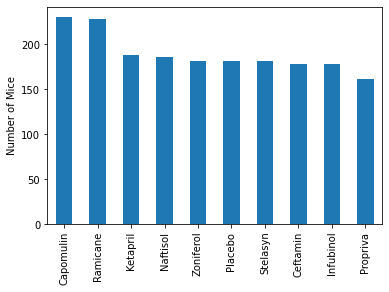

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x = mouse_study_comb_df["Drug Regimen"].value_counts()
x.plot(kind ="bar")
plt.ylabel("Number of Mice")


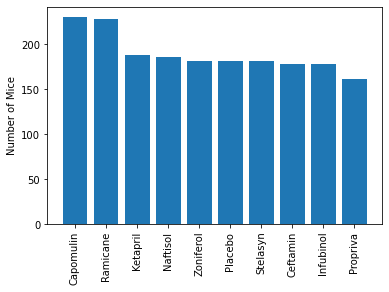

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x.index.values,x.values)
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice")


plt.show()


(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

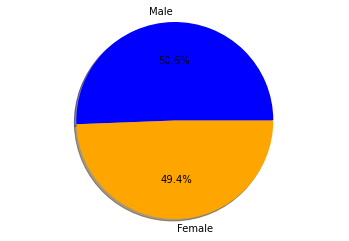

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt
import numpy as np

#Labels for the pie chart
x= mouse_study_comb_df["Sex"].value_counts()
labels = ["Male","Female"]
#Colors of pie chart
colors = ["blue","orange"]

plt.pie(x,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True)
plt.axis("equal")


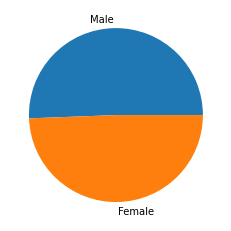

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
import numpy as np

y = np.array([50.6,49.4])
mylabels = ["Male","Female"]

plt.pie(y, labels=mylabels)
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
mouse_df = mouse_study_comb_df.groupby(["Mouse ID"])["Timepoint"].max()
mouse_df = mouse_df.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse = mouse_df.merge(mouse_study_comb_df,on=["Mouse ID","Timepoint"],how="left")
merged_mouse.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol=merged_mouse.loc[merged_mouse["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    # add subset 
    tumor_volume_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartile_list = [.25,.5,.75]
    
    quartiles = tumor_vol.quantile(quartile_list)
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Less than the lower bound or greater than the upper bound, for outliers.
    tumor_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(tumor_outliers)
    
      
#print(tumor_volume_data)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


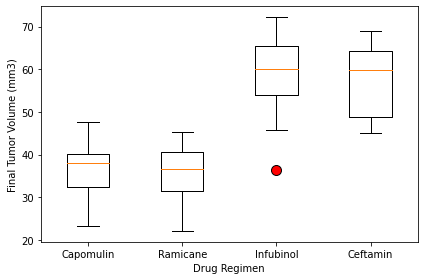

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, last_plot = plt.subplots()
last_plot.boxplot(tumor_volume_data, labels=treatments, flierprops={'markerfacecolor': 'r', 'markersize': 10})
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.tight_layout()
plt.show()


## Line and Scatter Plots

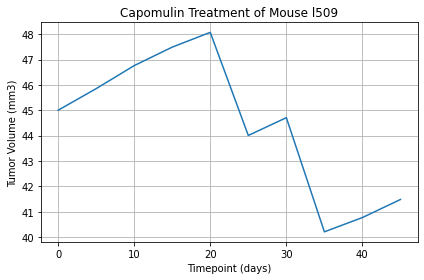

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import numpy as np
import matplotlib.pyplot as plt

mouse_study_comb_df = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID","Mouse ID"])

data_df = mouse_study_comb_df.loc[mouse_study_comb_df['Drug Regimen']=='Capomulin']

mouseid = 'l509'

mouse_df = mouse_study_comb_df.loc[mouse_study_comb_df['Mouse ID']== mouseid]

special_mouse = plt.plot(mouse_df["Timepoint"],mouse_df['Tumor Volume (mm3)'])

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

plt.tight_layout()
plt.grid(True)
plt.show()

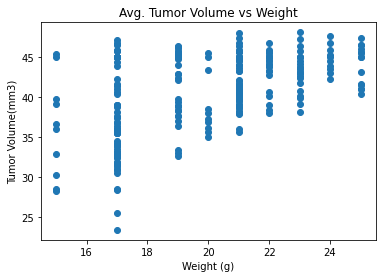

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_df = data_df.groupby('Mouse ID').mean()

tumor_volume = data_df['Tumor Volume (mm3)']
mouse_weight = data_df['Weight (g)']

#my_mouse = plt.plot(mouse_df["Weight (g)"],mouse_df["Tumor Volume (mm3)"])
plt.scatter(mouse_weight,tumor_volume)
plt.title('Avg. Tumor Volume vs Weight')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume(mm3)")
figsize=(14,14)
              
plt.show()

                                                            

## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.53
The r-squared is: 0.28


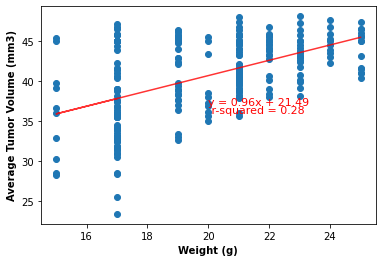

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Define x and y
x_values = mouse_weight
y_values = tumor_volume

#Correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

#Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#Calculate R-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y=mx +b
regress_val = x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_val, color = 'r', alpha=0.8)

plt.annotate(line_equation,(20,37), fontsize=11, color="red")
plt.annotate(f' r-squared = {r_squared}', (20,36), fontsize=11, color="red")

plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

#Print graph
plt.show()